In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing
from scipy.stats.mstats import winsorize
import seaborn as sns

In [2]:
df = pd.read_csv('bank-train.csv')
df_test = pd.read_csv('bank-test.csv')
df_validation = pd.read_csv('bank-validation.csv')

In [3]:

columns_name = ['Age','Type of job','Marital status','education','credit in default','balance bank',
                                   'has housing loan?','has personal loan?','contact communication','contact day of the month','month of year',
                                  'contact duration','number of contacts performed during','number of days that passed','number of contacts performed',
                                   'outcome of the previous marketing',
                                  'client subscribed']

In [4]:
df.head(3)

,47,management,divorced,tertiary,no,447,no.1,yes,unknown,7,may,126,1,-1,0,unknown.1,no.2
0,35,management,married,tertiary,no,3161,no,no,cellular,8,aug,433,2,-1,0,unknown,no
1,38,admin.,married,secondary,no,46,yes,yes,unknown,6,may,195,1,-1,0,unknown,no
2,38,admin.,single,secondary,no,-23,no,no,cellular,20,nov,48,2,-1,0,unknown,no


In [5]:
df.shape

(3720, 17)

In [6]:
df.columns = columns_name
df_test.columns = columns_name
df_validation.columns = columns_name

In [7]:
df

,Age,Type of job,Marital status,education,credit in default,balance bank,has housing loan?,has personal loan?,contact communication,contact day of the month,month of year,contact duration,number of contacts performed during,number of days that passed,number of contacts performed,outcome of the previous marketing,client subscribed
0,35,management,married,tertiary,no,3161,no,no,cellular,8,aug,433,2,-1,0,unknown,no
1,38,admin.,married,secondary,no,46,yes,yes,unknown,6,may,195,1,-1,0,unknown,no
2,38,admin.,single,secondary,no,-23,no,no,cellular,20,nov,48,2,-1,0,unknown,no
3,36,technician,single,secondary,no,9149,yes,no,cellular,13,aug,141,3,-1,0,unknown,no
4,48,management,married,secondary,no,4415,yes,no,cellular,8,apr,1032,3,141,7,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,31,technician,single,secondary,no,1014,yes,no,cellular,23,jul,158,4,-1,0,unknown,no
3716,51,management,single,tertiary,yes,-55,yes,no,cellular,11,may,281,2,266,6,failure,no
3717,36,management,single,tertiary,no,2944,no,no,cellular,18,aug,882,8,-1,0,unknown,yes
3718,31,admin.,single,secondary,no,757,no,no,cellular,3,feb,343,2,-1,0,unknown,no


In [8]:
df.dtypes

Age                                     int64
Type of job                            object
Marital status                         object
education                              object
credit in default                      object
balance bank                            int64
has housing loan?                      object
has personal loan?                     object
contact communication                  object
contact day of the month                int64
month of year                          object
contact duration                        int64
number of contacts performed during     int64
number of days that passed              int64
number of contacts performed            int64
outcome of the previous marketing      object
client subscribed                      object
dtype: object

In [9]:
df[['Type of job','Marital status','education','credit in default',
                                   'has housing loan?','has personal loan?','contact communication','month of year',
                                   'outcome of the previous marketing',
                                  'client subscribed']] = df[['Type of job','Marital status','education','credit in default',
                                   'has housing loan?','has personal loan?','contact communication','month of year',
                                   'outcome of the previous marketing',
                                  'client subscribed']].astype(str)

df_test[['Type of job','Marital status','education','credit in default',
                                   'has housing loan?','has personal loan?','contact communication','month of year',
                                   'outcome of the previous marketing',
                                  'client subscribed']] = df_test[['Type of job','Marital status','education','credit in default',
                                   'has housing loan?','has personal loan?','contact communication','month of year',
                                   'outcome of the previous marketing',
                                  'client subscribed']].astype(str)
df_validation[['Type of job','Marital status','education','credit in default',
                                   'has housing loan?','has personal loan?','contact communication','month of year',
                                   'outcome of the previous marketing',
                                  'client subscribed']] = df_validation[['Type of job','Marital status','education','credit in default',
                                   'has housing loan?','has personal loan?','contact communication','month of year',
                                   'outcome of the previous marketing',
                                  'client subscribed']].astype(str)


In [10]:
df.dtypes

Age                                     int64
Type of job                            object
Marital status                         object
education                              object
credit in default                      object
balance bank                            int64
has housing loan?                      object
has personal loan?                     object
contact communication                  object
contact day of the month                int64
month of year                          object
contact duration                        int64
number of contacts performed during     int64
number of days that passed              int64
number of contacts performed            int64
outcome of the previous marketing      object
client subscribed                      object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  3720 non-null   int64 
 1   Type of job                          3720 non-null   object
 2   Marital status                       3720 non-null   object
 3   education                            3720 non-null   object
 4   credit in default                    3720 non-null   object
 5   balance bank                         3720 non-null   int64 
 6   has housing loan?                    3720 non-null   object
 7   has personal loan?                   3720 non-null   object
 8   contact communication                3720 non-null   object
 9   contact day of the month             3720 non-null   int64 
 10  month of year                        3720 non-null   object
 11  contact duration                     3720 n

In [12]:
df.describe()

,Age,balance bank,contact day of the month,contact duration,number of contacts performed during,number of days that passed,number of contacts performed
count,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000
mean,41.244892,1421.665591,15.919892,266.154570,2.826075,40.376882,0.534677
std,10.627450,3079.411880,8.192989,264.796305,3.196129,101.602251,1.661736
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,64.000000,9.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,451.000000,16.000000,184.000000,2.000000,-1.000000,0.000000
75%,49.000000,1471.250000,21.000000,332.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
df.shape

(3720, 17)

In [14]:
df.isnull().sum()

Age                                    0
Type of job                            0
Marital status                         0
education                              0
credit in default                      0
balance bank                           0
has housing loan?                      0
has personal loan?                     0
contact communication                  0
contact day of the month               0
month of year                          0
contact duration                       0
number of contacts performed during    0
number of days that passed             0
number of contacts performed           0
outcome of the previous marketing      0
client subscribed                      0
dtype: int64

In [15]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [16]:
#unique values for each column
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

Age
[35 38 36 48 29 54 53 86 39 59 40 28 34 52 68 55 47 32 43 50 49 26 27 42
 41 33 56 73 30 24 31 46 44 37 51 58 45 57 23 67 60 22 25 80 63 75 77 19
 64 66 65 83 71 70 61 69 20 74 81 87 78 72 79 84 62 21 76]
------------------------------------------------------------
Type of job
['management' 'admin.' 'technician' 'services' 'blue-collar' 'retired'
 'housemaid' 'entrepreneur' 'unemployed' 'student' 'self-employed'
 'unknown']
------------------------------------------------------------
Marital status
['married' 'single' 'divorced']
------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------------------------------------
credit in default
['no' 'yes']
------------------------------------------------------------
balance bank
[ 3161    46   -23 ...  1014  2944 22856]
------------------------------------------------------------
has housing loan?
['no' 'yes']
--------------------------------------------

In [17]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,Age,33
1,balance bank,405
2,contact day of the month,0
3,contact duration,272
4,number of contacts performed during,277
5,number of days that passed,673
6,number of contacts performed,673


In [18]:
### numerical
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['Age',
 'balance bank',
 'contact day of the month',
 'contact duration',
 'number of contacts performed during',
 'number of days that passed',
 'number of contacts performed']

In [19]:
numerical_cols_test = list(df.select_dtypes(exclude=['object']))
numerical_cols_test

['Age',
 'balance bank',
 'contact day of the month',
 'contact duration',
 'number of contacts performed during',
 'number of days that passed',
 'number of contacts performed']

In [20]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['Type of job',
 'Marital status',
 'education',
 'credit in default',
 'has housing loan?',
 'has personal loan?',
 'contact communication',
 'month of year',
 'outcome of the previous marketing',
 'client subscribed']

In [21]:
df['client subscribed'].value_counts()

no     3286
yes     434
Name: client subscribed, dtype: int64

In [22]:

def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df['client subscribed'])

no     88.333333
yes    11.666667
Name: client subscribed, dtype: float64

<AxesSubplot:>

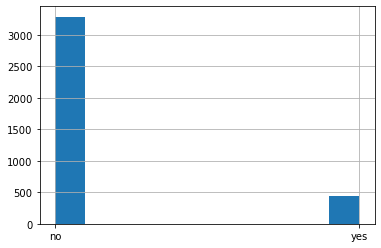

In [23]:
df['client subscribed'].hist()

In [24]:
df['client subscribed'].value_counts()

no     3286
yes     434
Name: client subscribed, dtype: int64

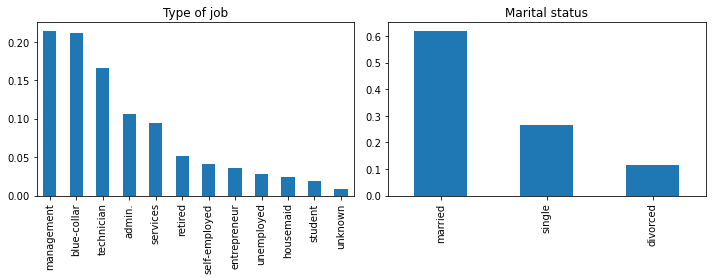

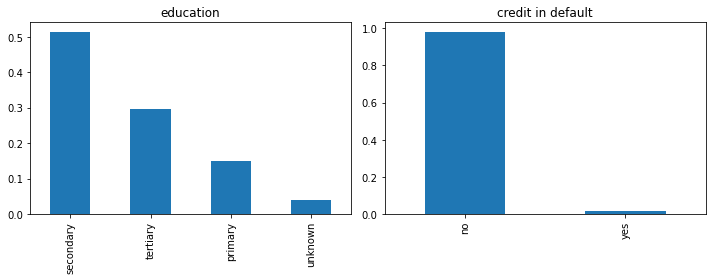

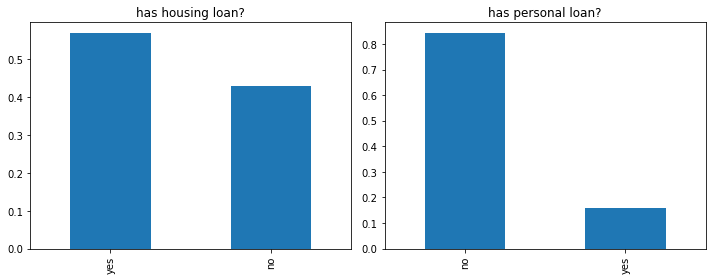

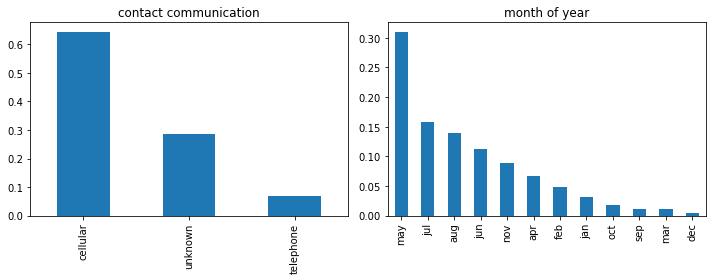

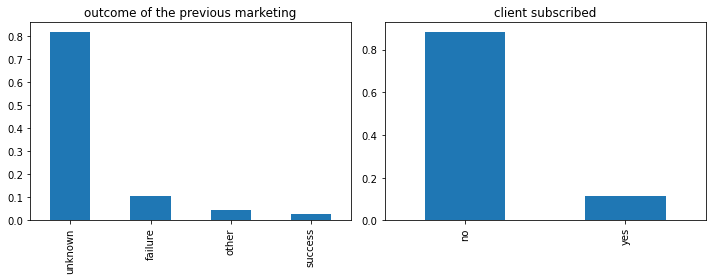

In [25]:
# Function to perform univariate analysis of categorical columns
def plot_categorical(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
plot = plot_categorical(df)
plt.show()

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


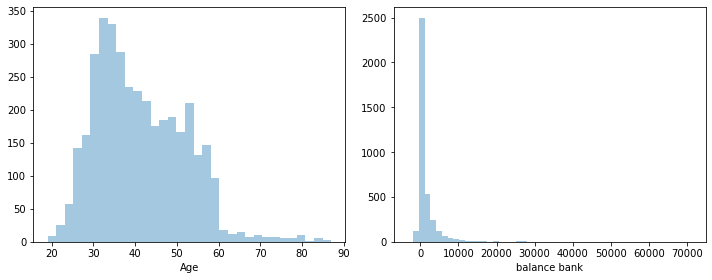

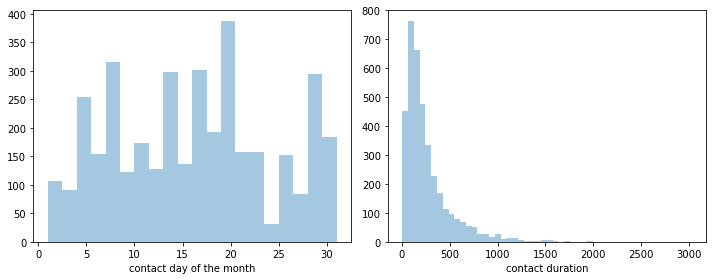

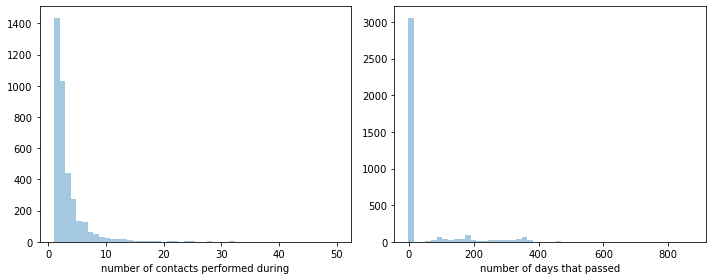

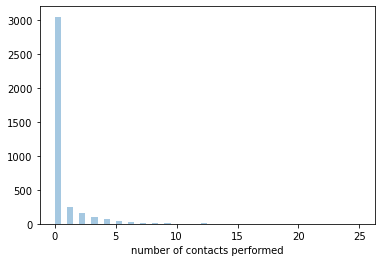

In [26]:

# Function to plot histograms
def plot_continuous(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

plot_continuous(df)            

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


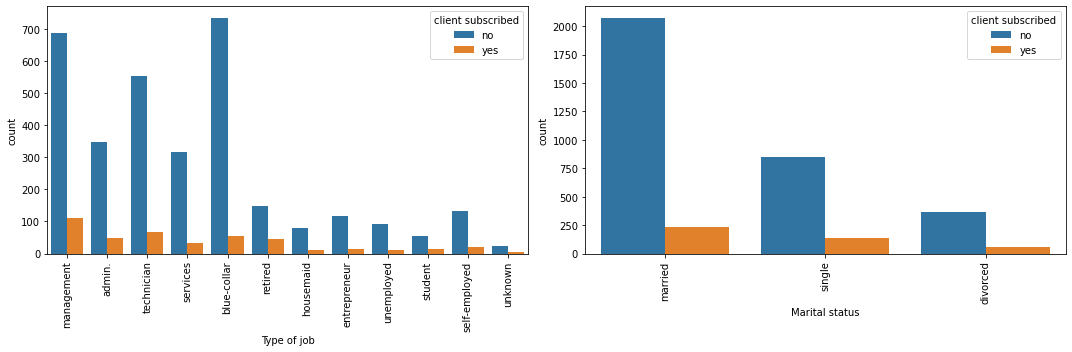

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


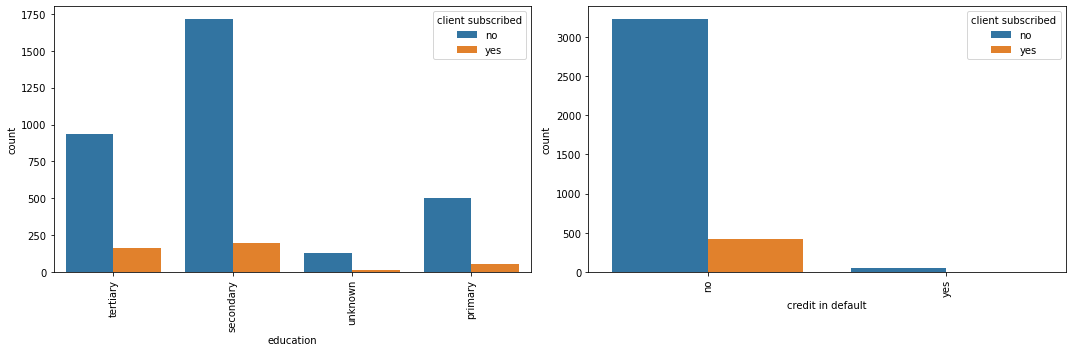

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


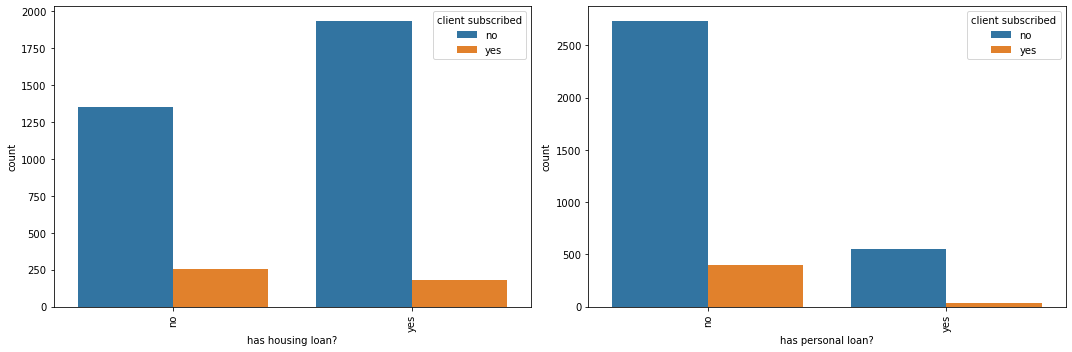

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


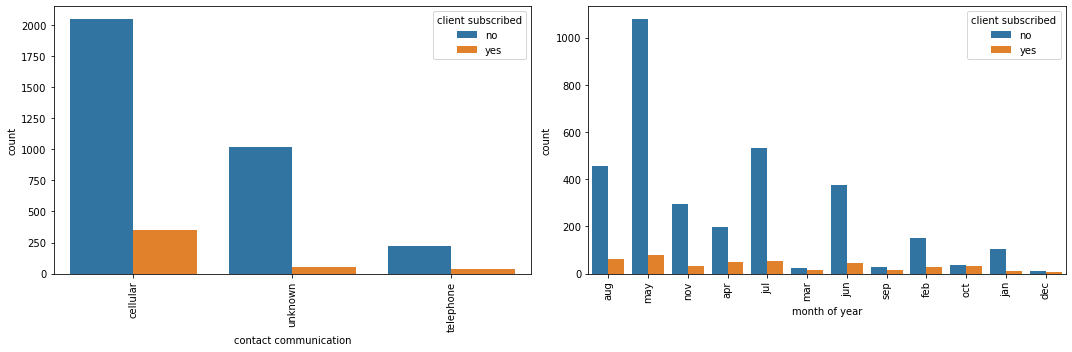

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


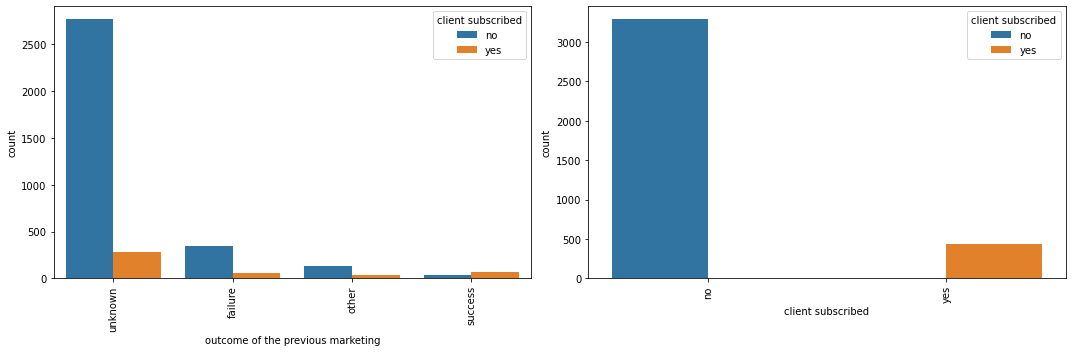

In [27]:
def target_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


target_categorical(df,df['client subscribed'])

In [28]:
df2 = df

In [29]:
df2['contact duration'] = df2['contact duration'].apply(lambda n:n/60).round(2)
#df_test['contact duration'] = df_test['contact duration'].apply(lambda n:n/60).round(2)
#df_validation['contact duration'] = df_validation['contact duration'].apply(lambda n:n/60).round(2)

In [30]:
df2['contact duration']

0        7.22
1        3.25
2        0.80
3        2.35
4       17.20
        ...  
3715     2.63
3716     4.68
3717    14.70
3718     5.72
3719     2.57
Name: contact duration, Length: 3720, dtype: float64

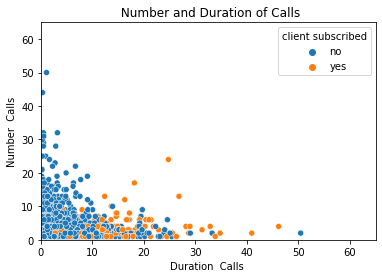

In [31]:
duration_campaign = sns.scatterplot(x='contact duration', y='number of contacts performed during',data = df,
                     hue = 'client subscribed')

plt.axis([0,65,0,65])
plt.ylabel('Number  Calls')
plt.xlabel('Duration  Calls ')
plt.title(' Number and Duration of Calls')
# Annotation
plt.show()

In [32]:
#Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)
df_test = treat_outliers(df_test)
df_validation = treat_outliers(df_validation)

In [33]:
df.head()

,Age,Type of job,Marital status,education,credit in default,balance bank,has housing loan?,has personal loan?,contact communication,contact day of the month,month of year,contact duration,number of contacts performed during,number of days that passed,number of contacts performed,outcome of the previous marketing,client subscribed
0,35,management,married,tertiary,no,3161,no,no,cellular,8,aug,7.22,2,-1,0,unknown,no
1,38,admin.,married,secondary,no,46,yes,yes,unknown,6,may,3.25,1,-1,0,unknown,no
2,38,admin.,single,secondary,no,-23,no,no,cellular,20,nov,0.80,2,-1,0,unknown,no
3,36,technician,single,secondary,no,3792,yes,no,cellular,13,aug,2.35,3,-1,0,unknown,no
4,48,management,married,secondary,no,3792,yes,no,cellular,8,apr,9.78,3,141,2,failure,yes


In [34]:
def convertcategory(df):
    '''
    Convert the categorical dataframe into numerical dataframe
    
    Argument:
    df -- name of the dataframe
    
    Return:
    imp_df -- a dataframe replacing the category values into numerical values
    '''
    imp_df = df

    for f in imp_df.columns:
        if imp_df[f].dtype== 'object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(imp_df[f].values))
            imp_df[f] = lbl.transform(list(imp_df[f].values))
            
    return imp_df

In [35]:
#preprocessing
df = convertcategory(df)
df_test = convertcategory(df_test)
df_validation = convertcategory(df_validation)


In [36]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

features = df[numerical_cols]

ct = ColumnTransformer([
        ('somename', StandardScaler(), numerical_cols)
    ], remainder='passthrough')


features = ct.fit_transform(features)
df[numerical_cols] = features


features2 = df_test[numerical_cols]


features2 = ct.fit_transform(features2)
df_test[numerical_cols] = features2

features3 = df_validation[numerical_cols]


features3 = ct.fit_transform(features3)
df_validation[numerical_cols] = features3



In [37]:
df.head(3)

,Age,Type of job,Marital status,education,credit in default,balance bank,has housing loan?,has personal loan?,contact communication,contact day of the month,month of year,contact duration,number of contacts performed during,number of days that passed,number of contacts performed,outcome of the previous marketing,client subscribed
0,-0.625390,4,1,2,0,1.710259,0,0,0,-0.988999,1,1.143451,-0.257847,-0.451182,-0.447344,3,0
1,-0.301372,0,1,1,0,-0.760287,1,1,2,-1.242474,8,-0.241608,-0.868018,-0.451182,-0.447344,3,0
2,-0.301372,0,2,1,0,-0.815012,0,0,0,0.531856,9,-1.096367,-0.257847,-0.451182,-0.447344,3,0


In [65]:
def CorrData(input_df):

 
    sns.heatmap(df[numerical_cols].corr(),annot=True,cmap = 'Blues',linewidths=0.2) #data.corr()-->correlation matrix
    fig=plt.gcf()
    fig.set_size_inches(18,8)
    plt.show()

In [66]:
tt = df[numerical_cols]
tt

,Age,balance bank,contact day of the month,contact duration,number of contacts performed during,number of days that passed,number of contacts performed
0,-0.625390,1.710259,-0.988999,1.143451,-0.257847,-0.451182,-0.447344
1,-0.301372,-0.760287,-1.242474,-0.241608,-0.868018,-0.451182,-0.447344
2,-0.301372,-0.815012,0.531856,-1.096367,-0.257847,-0.451182,-0.447344
3,-0.517384,2.210713,-0.355309,-0.555601,0.352325,-0.451182,-0.447344
4,0.778689,2.210713,-0.988999,2.036586,0.352325,1.788195,2.561916
...,...,...,...,...,...,...,...
3715,-1.057414,0.007446,0.912070,-0.457914,0.962496,-0.451182,-0.447344
3716,1.102707,-0.840391,-0.608785,0.257292,-0.257847,2.450546,2.561916
3717,-0.517384,1.538154,0.278381,2.036586,2.182838,-0.451182,-0.447344
3718,-1.057414,-0.196384,-1.622688,0.620129,-0.257847,-0.451182,-0.447344


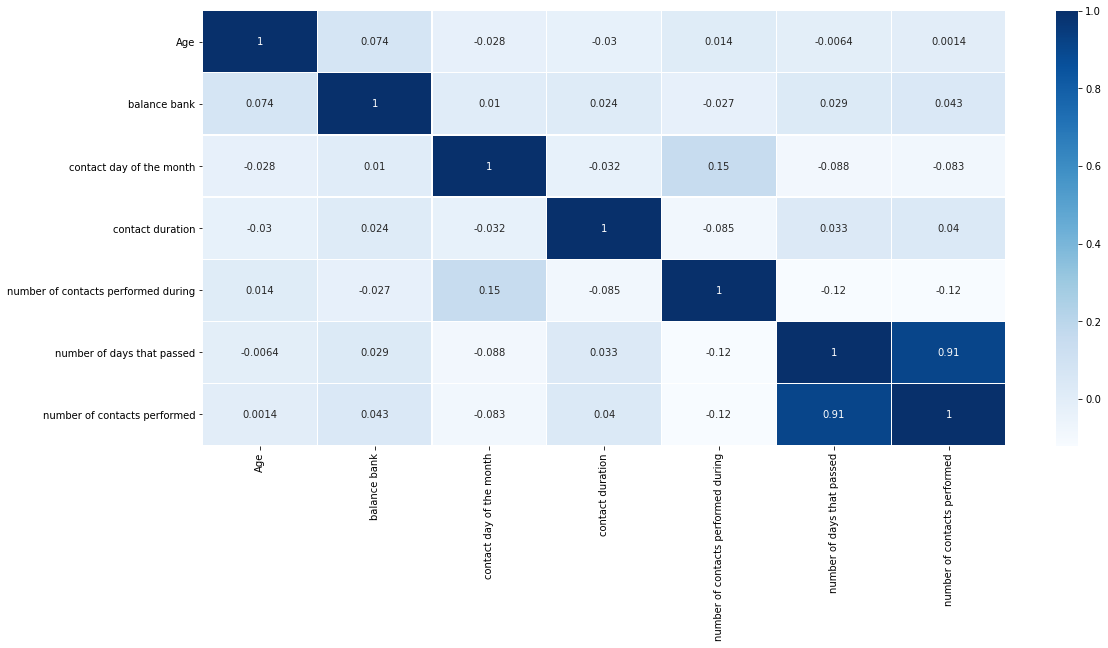

In [67]:
CorrData(tt)

In [40]:
x_train = df.drop(['client subscribed'], axis = 1)
y_train = df['client subscribed']

x_test = df_test.drop(['client subscribed'], axis = 1)
y_test = df_test['client subscribed']

x_validation = df_validation.drop(['client subscribed'], axis = 1)
y_validation = df_validation['client subscribed']


In [41]:

print("predictor of input dataset shape: {shape}".format(shape=x_train.shape))
print("predictor of target dataset shape: {shape}".format(shape=y_train.shape))

print("predictor of input dataset shape: {shape}".format(shape=x_validation.shape))
print("predictor of target dataset shape: {shape}".format(shape=y_validation.shape))

print("predictor of input dataset shape: {shape}".format(shape=x_test.shape))
print("predictor of target dataset shape: {shape}".format(shape=y_test.shape))

predictor of input dataset shape: (3720, 16)
predictor of target dataset shape: (3720,)
predictor of input dataset shape: (399, 16)
predictor of target dataset shape: (399,)
predictor of input dataset shape: (399, 16)
predictor of target dataset shape: (399,)


In [42]:
#x_test.columns

In [43]:
#x_validation.columns

In [44]:
print(np.count_nonzero(y_train > 0))

434


In [45]:
print(np.count_nonzero(y_train == 0))

3286


In [46]:
y_train

0       0
1       0
2       0
3       0
4       1
       ..
3715    0
3716    0
3717    1
3718    0
3719    0
Name: client subscribed, Length: 3720, dtype: int64

In [47]:
#y_validation.value_counts()

In [48]:
#y_test.value_counts()

In [49]:
import statsmodels.api as sm
X_1 = sm.add_constant(x_train)
#Fitting sm.OLS model
model = sm.OLS(y_train,X_1).fit()
model.pvalues


const                                   6.417919e-06
Age                                     2.680009e-01
Type of job                             4.851150e-01
Marital status                          9.127403e-01
education                               1.093451e-01
credit in default                       3.370389e-01
balance bank                            5.153561e-03
has housing loan?                       7.780584e-09
has personal loan?                      8.408970e-05
contact communication                   2.766143e-06
contact day of the month                3.974092e-01
month of year                           7.182308e-01
contact duration                       4.626821e-136
number of contacts performed during     6.318681e-02
number of days that passed              1.417560e-04
number of contacts performed            1.090340e-19
outcome of the previous marketing       1.806365e-21
dtype: float64

In [50]:
#Backward Elimination
cols = list(x_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['balance bank', 'has housing loan?', 'has personal loan?', 'contact communication', 'contact duration', 'number of days that passed', 'number of contacts performed', 'outcome of the previous marketing']


In [51]:
x_train = x_train[selected_features_BE]
x_validation = x_validation[selected_features_BE]
x_test = x_test[selected_features_BE]

In [52]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
#oversample = SMOTE()
# fit and apply the transform
x_train, y_train = oversample.fit_resample(x_train, y_train)

<AxesSubplot:>

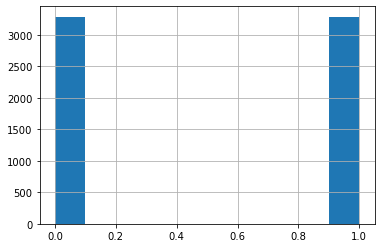

In [53]:
y_train.hist()

## Naive Bayes

Accuracy Train : 73.84357881923312
Accuracy Test : 71.17794486215539
Confusion Matrix : 
 [[248 107]
 [  8  36]]
Precision : 0.2517482517482518
Recall : 0.8181818181818182
F1-score : 0.3850267379679145


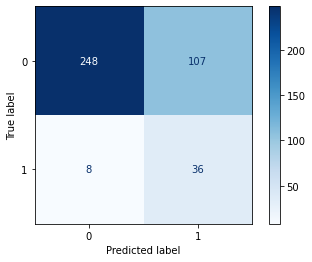

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
bnb = BernoulliNB(binarize=0.0)
bnb.fit(x_train, y_train)
acc_train = bnb.score(x_train,y_train)*100


y_pred = bnb.predict(x_validation)

cm = confusion_matrix(y_validation, y_pred)

acc = accuracy_score(y_validation, y_pred)*100
pre = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)


print("Accuracy Train :",acc_train)
print("Accuracy Test :",acc)
print("Confusion Matrix : \n",cm)
print("Precision :",pre)
print("Recall :",recall)
print("F1-score :",f1)
plot_confusion_matrix(bnb, x_validation, y_validation,cmap=plt.cm.Blues)
y_pred_test = bnb.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)*100
recall_test = recall_score(y_test,y_pred)
#rint("TEST ACC: ", acc_test)
#rint("RECALL Test: ", recall_test)

## Logistic regression

Accuracy Train : 79.44309190505173
Accuracy Test : 78.94736842105263
Confusion Matrix : 
 [[281  74]
 [ 10  34]]
Precision : 0.3148148148148148
Recall : 0.7727272727272727
F1-score : 0.4473684210526316
TEST ACC:  67.66917293233082
RECALL Test:  0.2558139534883721


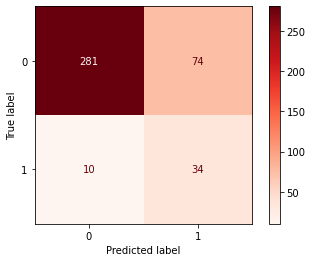

In [55]:
# standard con max_iter = 100 e C = 1.0
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter = 10000000000000000)
lr.fit(x_train, y_train)

acc_train = lr.score(x_train,y_train)*100


y_pred = lr.predict(x_validation)

cm = confusion_matrix(y_validation, y_pred)

acc = accuracy_score(y_validation, y_pred)*100
pre = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)


print("Accuracy Train :",acc_train)
print("Accuracy Test :",acc)
print("Confusion Matrix : \n",cm)
print("Precision :",pre)
print("Recall :",recall)
print("F1-score :",f1)

plot_confusion_matrix(lr, x_validation, y_validation,cmap=plt.cm.Reds)
y_pred_test = lr.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)*100
recall_test = recall_score(y_test,y_pred)
print("TEST ACC: ", acc_test)
print("RECALL Test: ", recall_test)


The accuracy train of the model is:  79.44309190505173  C :  0.1
The accuracy test of the model is:  78.94736842105263  C :  0.1
The recall of the model is:  0.7727272727272727  C :  0.1
   


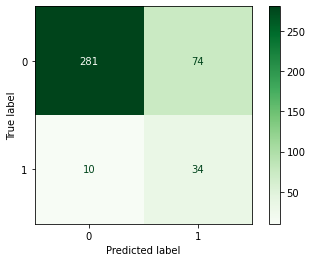

In [56]:
# find the optimal parameter for logistic regression
C = [ 0.00000001,0.00001,0.01, 0.1, 1, 10, 100, 1000]
best_accuracy = 0
best_train = 0
best_C = 0
best_recall = 0
for i in C:
    lr_1 = LogisticRegression(C = i, max_iter = 100000)
    lr_1.fit(x_train, y_train)
    y_pred_train = lr_1.predict(x_train)
    y_pred = lr_1.predict(x_validation)
    acc = accuracy_score(y_validation, y_pred)*100
    acc_train = lr.score(x_train,y_train)*100
    pre = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)
    f1 = f1_score(y_validation, y_pred)
    if acc > best_accuracy:
            best_accuracy = acc
            best_train = acc_train
            best_C = i
            best_lr = lr_1
            best_recall = recall
print('The accuracy train of the model is: ', best_train, ' C : ', best_C)
print('The accuracy test of the model is: ', best_accuracy, ' C : ', best_C)
print('The recall of the model is: ', best_recall, ' C : ', best_C)
plot_confusion_matrix(best_lr, x_validation, y_validation,cmap=plt.cm.Greens)
print('   ')

## SVC Linear Kernel

The accuracy train of the model is:  78.69750456482045  C :  0.1
The accuracy test of the model is:  79.9498746867168  C :  0.1
The recall of the model is:  0.7272727272727273  C :  0.1
   


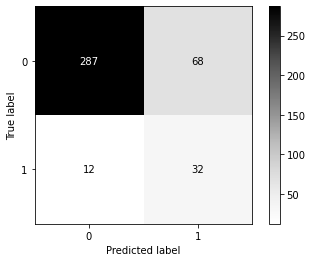

In [57]:
from sklearn.svm import SVC

# find the optimal parameter for linear kernel
C = [0.000001,0.00001, 0.01, 0.1, 1]
best_accuracy = 0
best_train = 0
best_C = 0
best_recall = 0
for i in C:
    svc = SVC(C = i, kernel = 'linear')
    svc.fit(x_train, y_train)
    y_pred_train = svc.predict(x_train)
    y_pred = svc.predict(x_validation)
    acc = accuracy_score(y_validation, y_pred)*100
    acc_train = svc.score(x_train,y_train)*100
    pre = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)
    f1 = f1_score(y_validation, y_pred)
    if acc > best_accuracy:
            best_accuracy = acc
            best_train = acc_train
            best_recall = recall
            best_C = i
            best_svc = svc 
print('The accuracy train of the model is: ', best_train, ' C : ', best_C)
print('The accuracy test of the model is: ', best_accuracy, ' C : ', best_C)
print('The recall of the model is: ', best_recall, ' C : ', best_C)
plot_confusion_matrix(best_svc, x_validation, y_validation,cmap=plt.cm.Greys)
print('   ')

## SVC Radio Kernel

The accuracy train of the radio kernel model is:  82.54716981132076  C :  10 gamma :  0.1
The accuracy test of the radio kernel model is:  80.7017543859649  C :  10 gamma :  0.1
The recall of the model is:  0.8181818181818182  C :  10
   


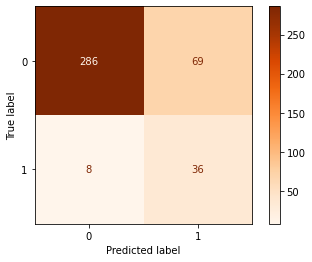

In [58]:
from sklearn.svm import SVC

# find the optimal parameter for radio kernel
C = [0.000001,0.00001, 0.01, 0.1, 1, 10]
best_accuracy = 0
best_train = 0
best_C = 0
best_gamma = 0
best_recall = 0
gamma = [1,0.1,0.001,0.0001, 0.00000000000001]
for i in C:
    for g in gamma:
        svc = SVC(C = i, kernel = 'rbf', gamma = g)
        svc.fit(x_train, y_train)
        y_pred_train = svc.predict(x_train)
        y_pred = svc.predict(x_validation)
        acc = accuracy_score(y_validation, y_pred)*100
        acc_train = svc.score(x_train,y_train)*100
        pre = precision_score(y_validation, y_pred)
        recall = recall_score(y_validation, y_pred)
        f1 = f1_score(y_validation, y_pred)
        if  acc > best_accuracy:
            best_accuracy = acc
            best_C = i
            best_train = acc_train
            best_recall = recall
            best_gamma = g
            best_svc = svc
            
            
print('The accuracy train of the radio kernel model is: ', best_train, ' C : ', best_C, 'gamma : ', best_gamma)    
print('The accuracy test of the radio kernel model is: ', best_accuracy, ' C : ', best_C, 'gamma : ', best_gamma)
print('The recall of the model is: ', best_recall, ' C : ', best_C)
plot_confusion_matrix(best_svc, x_validation, y_validation,cmap=plt.cm.Oranges)
print('   ')

In [59]:
#BEST MODEL
svc = SVC(C = 10, kernel = 'rbf', gamma = 0.1)
svc.fit(x_train, y_train)
y_pred_test = svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy Test :",acc)
print("Confusion Matrix : \n",cm)


Accuracy Test : 75.6892230576441
Confusion Matrix : 
 [[293  63]
 [ 34   9]]
